In [1]:
import numpy as np
import gym
import random 
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
env=gym.make('Taxi-v3')
env.render()


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [3]:
action_size=env.action_space.n
state_size=env.observation_space.n


In [4]:
print(action_size,state_size)

6 500


In [5]:
qtable = np.zeros((state_size,action_size))
print(qtable)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [6]:
total_episode=10000   #total episode
total_test_episode  =1000  # total test episode
max_steps =99      # Max Steps per episode
learning_rate=0.7  # Learning rate
gamma=0.618   #  Discounting rate
# Exploration Parameters
epsilon=0.9 # Exploration rate
max_epsilon=1.0  # Exploration probability at start
min_epsilon=0.01 # Minimum Exploration probability
decay_rate=0.01 # Exponential Decay rate for exploration

In [7]:
 for episode in range(total_episode):
        # Reset the environment
        state = env.reset()
        step = 0
        done = False
        for step in range(max_steps):
            # Choose an action a in the current world state(s)
            ## First we randomize a number
            exp_exp_tradeoff = random.uniform(0,1)
            ## If this exp_exp_tradeoff is greater than epsilon --> Exploitation which means taking actions with biggest Q value
            if exp_exp_tradeoff > epsilon:
                action  = np.argmax(qtable[state,:])
                
            # Else doing a random choice --> Exploration
            else:
                action = env.action_space.sample()
            # Take Action (a) and observe the outcome state(s') and rward r
                
            new_state, reward, done, info = env.step(action)
            
            # update Q(s,a) + lr [R(s,a)+gamma*max Q(s',a') - Q(s,a)]       ---> Bellman's Equation
            qtable[state,action] = qtable[state,action] + learning_rate * ( reward + gamma * np.max(qtable[new_state, :]) - qtable[state,action])
            # our new state
            state =new_state
            # if done :  Finish episode
            if done ==True:
                break
        
        
        # Reduce epsilon (because we need less and less exploration)
        epsilon = min_epsilon + (max_epsilon - min_epsilon)* np.exp(-decay_rate*episode)
        
        
            
            

Score over time: 7.95


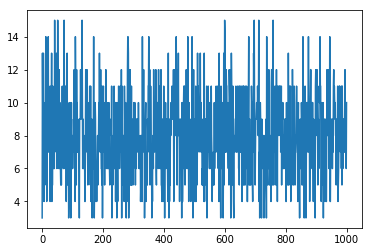

In [8]:
env.reset()
rewards = []

for episode in range(total_test_episode):
    state = env.reset()
    step = 0
    done = False
    total_rewards=0
   # print("**************************************************")
    #print("EPISODE: ",episode)
    for step in range(max_steps):
        #env.render()
        #Take actions (index) that have the maximum expected future reward given that state
        action = np.argmax(qtable[state,:])
        new_state , reward ,done, info = env.step(action)
        total_rewards += reward
       
        if done:
            rewards.append(total_rewards)
            #print("Score :" ,total_rewards)
            break
        state=new_state
env.close()
plt.plot(rewards)
print("Score over time: " + str(sum(rewards)/total_test_episode))


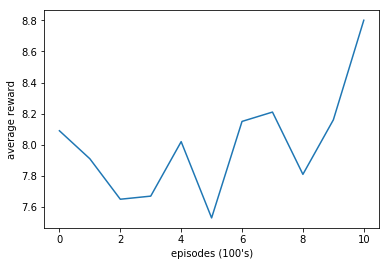

In [9]:
def get_average(values):
    
    return sum(values)/len(values)

avg_reward=[]
for i in range(0,len(rewards),max_steps):
    avg_reward.append(get_average(rewards[i:i+100]))

plt.plot(avg_reward)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()
